# General Imports
We need keras, obviously, to learn things.

But these are also handy: matplotlib (graph progress to see if you're training) numpy (works well with the matrices)

In [1]:
from tensorflow import keras as K
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Reshape, Conv2D, MaxPooling2D, Dense, Flatten

# Importing MNIST
MNIST is a labelled dataset of handwritten characters. We're going to classify them. It has a special datatype. Don't worry about this bit, just copy-paste and we can get on to actually learning! Also, use the paths to the MNIST files you downloaded. If you didn't download them, you can using a function or off their website.

Side-note: This is different from the tensorflow workbook. The shape of the data is different and requires a reshape.

In [2]:
(train_images, train_labels), (test_images, test_labels) = K.datasets.mnist.load_data()

# Determining Data Shape
How exactly does our data look like, anyway?

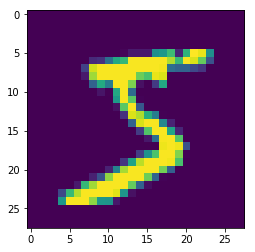

In [3]:
plt.imshow(np.squeeze(train_images[0]))
plt.show()

In [4]:
print(train_labels[0])

5


In [5]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


# One-Hot Vectors
train_labels[0] == 5. That's the number we need, right?

Not really. Is incorrectly guessing that this number was 6 any different from incorrectly guessing that it was 1, when we're trying to classify it from handwriting? Not really.

So, we need a way to show that each wrong answer is the same. Enter the one-hot vector. [0,0,0,0,1,0,0,0,0,0]

This is saying that the probability that the number represented by the 5th axis here, is 1. This turns out to be much better in being able to classify it.

In [6]:
train_labels =  K.utils.to_categorical(train_labels)
test_labels = K.utils.to_categorical(test_labels)


In [7]:
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Convolutional Neural Network
It's basically magic that gives you the answer. Akil probably talked about it earlier. It consists of: Convolutional Layers

Filters: an integer. It literally applies some sort of filter.
Kernel Size: a list of integers for every dimension. Tells the network to look for features around this size.
Activation Function: allows our neural net to learn nonlinearities.
Max Pooling

Pool Size
Stride A fully connected layer at the end which gives you your final answer.
Here's a 4 hidden layer one. For each layer, you put the input as the previous layer (i.e. your first layer should be connected to inputs, then a max pooling to first, then second layer to max pooling of first layer, etc.)

Generally, more layers get better performance (up to a point!). You can add more layers, play with filters and kernel sizes and strides, whatever.

In [8]:
model = K.Sequential()

In [9]:
model.add(Reshape([28,28,1], input_shape = (28,28)) )
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# The Dense Layer(s)
First, we need to flatten our inputs. The dense layer doesn't take 4 dimensional input, it takes 2 dimensional input (batch_size * something else).

To find the second parameter for flattening, we just need how many output nodes are in the last max pooling layer. Print out its shape and multiply them together.

The final layer will have the softmax activation function. The outputs to each final node will be some number which describes how much the network thinks the output corresponding to the node is correct.

You could take the maximum output across nodes to predict an answer, but this would be non-differentiable. So we take the SOFTmax, which gives us an answer which we can use to learn. Softmax also scales all outputs so that the total probability adds to 1, which is useful.

In [10]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling
There is a function called categorical cross-entropy which works with one-hot labels. It's mathemagical, and you should use it for almost, if not all, your classification problems.

# Optimizer
Calculus? That sounds hard! We don't need that in our life, let tensorflow do it for us. This function will automatically optimize all our variables to give us the best answer.

The parameter passed to optimizer here is learning rate. This determines how fast to learn. Bigger learning rates train more quickly, but might be unstable and not converge accurately. Smaller learning rates might take forever and get stuck in local optima. No one knows what the best one is. Play around and pick the best!

But, AdamOptimizer here makes picking one a bit of an easier task. So, I'll use this optimizer. There's quite a few.

In [11]:
opt = K.optimizers.Adam(lr = 1e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fitting the Model
Fitting the model requires no BS in keras. (please note that I decided to early stop the training since it seemed to be very accurate already)

In [12]:
model.fit(train_images, train_labels,
          batch_size=64, epochs=5,
          validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 100s 2ms/step - loss: 1.8669 - acc: 0.8427 - val_loss: 0.1383 - val_acc: 0.9705
Epoch 2/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1132 - acc: 0.9722 - val_loss: 0.0968 - val_acc: 0.9763
Epoch 3/5
 5312/60000 [=>............................] - ETA: 1:22 - loss: 0.0623 - acc: 0.9832- ETA - ETA: 1:23 - l

KeyboardInterrupt: 

Do the predictions make sense?

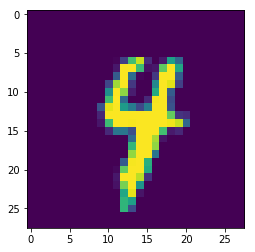

Prediction: [4]
Class probs: [[5.7505369e-09 3.9082138e-08 1.6942427e-09 8.3717438e-08 9.9933618e-01
  5.3833787e-07 1.5685824e-11 2.2278144e-08 2.2952800e-06 6.6077692e-04]]


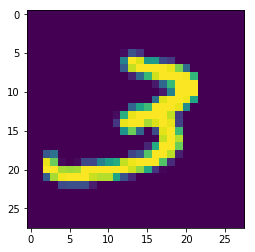

Prediction: [3]
Class probs: [[5.0815008e-11 8.6539451e-13 4.0121439e-12 1.0000000e+00 1.5490817e-11
  1.5277045e-09 6.5154134e-18 8.8725276e-09 2.9771411e-11 1.4055712e-09]]


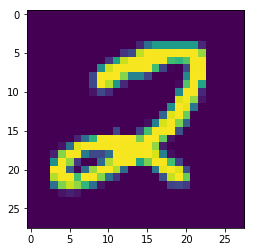

Prediction: [2]
Class probs: [[5.4265483e-15 8.1634886e-09 1.0000000e+00 4.9038530e-11 5.9744656e-15
  4.0596595e-17 9.0622004e-17 1.2196463e-11 6.0064900e-12 1.5641183e-16]]


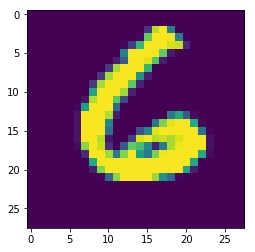

Prediction: [6]
Class probs: [[1.7554968e-11 8.5121755e-17 5.6457616e-12 2.1061993e-14 5.4159317e-14
  5.2790416e-10 1.0000000e+00 3.3068282e-19 6.3828207e-13 1.1253681e-16]]


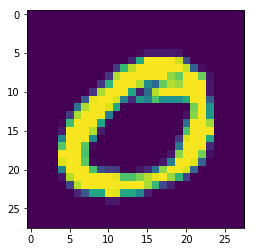

Prediction: [0]
Class probs: [[1.0000000e+00 9.3124510e-14 5.6707243e-12 1.7239426e-13 1.2204983e-18
  1.4610004e-12 1.1856165e-12 5.8839332e-13 1.5020250e-12 6.8576877e-13]]


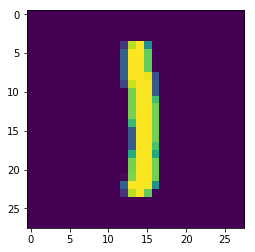

Prediction: [1]
Class probs: [[9.5879977e-07 9.9999857e-01 3.3989028e-10 6.9278201e-08 8.2292807e-08
  5.3865534e-10 5.9812648e-11 6.2916037e-09 2.5390889e-07 1.1431622e-09]]


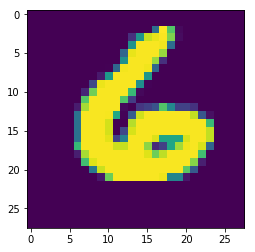

Prediction: [6]
Class probs: [[1.0390971e-09 3.4230885e-11 3.0193213e-11 5.7596905e-10 1.5784172e-08
  3.3880276e-10 1.0000000e+00 3.9433933e-19 1.4168033e-09 5.2954613e-13]]


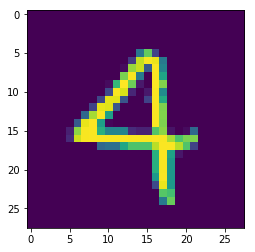

Prediction: [4]
Class probs: [[2.9150478e-12 1.0227550e-12 2.6308214e-11 1.5116422e-10 9.9999940e-01
  3.5846420e-11 1.7874499e-13 5.0111666e-08 6.5550362e-14 6.2294265e-07]]


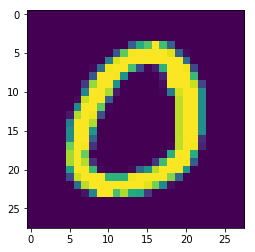

Prediction: [0]
Class probs: [[1.00000000e+00 1.21030026e-11 5.92496607e-11 9.41100279e-13
  1.02703466e-16 4.88956511e-14 6.99231634e-13 3.11002758e-16
  2.24178627e-13 4.34063430e-13]]


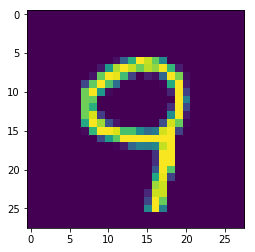

Prediction: [9]
Class probs: [[5.8653189e-09 1.0146401e-10 1.1572513e-10 1.4537640e-08 3.1869155e-07
  2.3247706e-08 1.6236407e-13 1.8342456e-08 2.1258943e-06 9.9999750e-01]]


In [13]:
from random import randrange
for x in range(10):
    n = randrange(0,10000)
    plt.imshow(np.squeeze(test_images[n]))
    plt.show()

    out = model.predict_classes([[test_images[n]]])
    print("Prediction: " + str(out))
    
    probs = model.predict_proba([[test_images[n]]])
    print("Class probs: "+ str(probs))
